In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ace_tools_open as tools
import pandas as pd

In [3]:
def simulate_monotonic_growth_with_failure(n_sim=100000, p_zero=0.9, a=100, m=300, b=600):
    Q1, Q2, Q3 = np.zeros(n_sim), np.zeros(n_sim), np.zeros(n_sim)
    mask_success = np.random.rand(n_sim) > p_zero
    n_success = np.sum(mask_success)

    accepted = 0
    i = 0
    while accepted < n_success:
        q1 = np.random.triangular(a, m, b)
        q2 = np.random.triangular(a, m, b)
        q3 = np.random.triangular(a, m, b)
        if q1 < q2 < q3:
            indices = np.where(mask_success)[0]
            Q1[indices[accepted]] = q1
            Q2[indices[accepted]] = q2
            Q3[indices[accepted]] = q3
            accepted += 1
        i += 1
        if i > n_sim * 10:
            break  # защита от бесконечного цикла

    return Q1, Q2, Q3

# Симуляция
Q1, Q2, Q3 = simulate_monotonic_growth_with_failure()


In [4]:

# Преобразуем в DataFrame
df = pd.DataFrame({
    "Q1": Q1,
    "Q2": Q2,
    "Q3": Q3
})

tools.display_dataframe_to_user(name="Объемы продаж по годам с провалами и ростом", dataframe=df)


Объемы продаж по годам с провалами и ростом


Loading ITables v2.4.0 from the internet... (need help?)


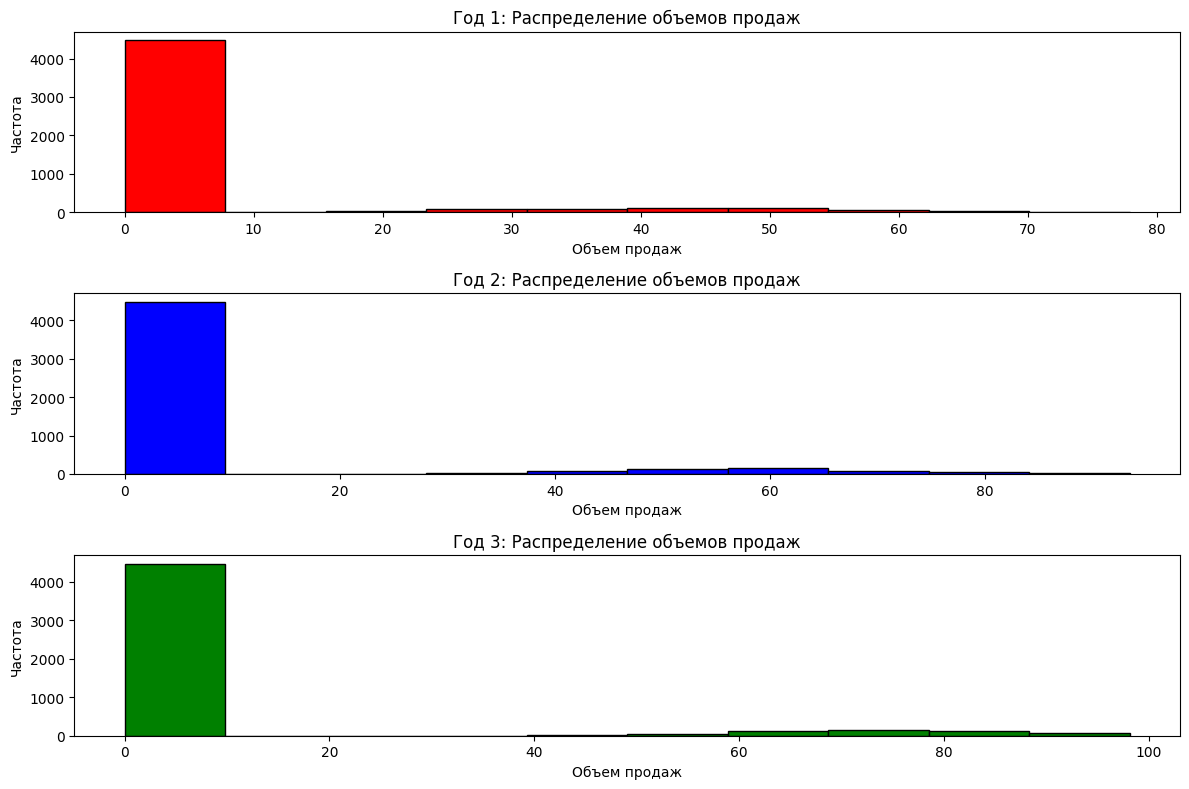

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры треугольного распределения
a, m, b = 15, 60, 100  # минимум, базовое, максимум
p_zero = 0.9  # вероятность нулевых продаж

n_sim = 5000
Q1, Q2, Q3 = np.zeros(n_sim), np.zeros(n_sim), np.zeros(n_sim)
mask_success = np.random.rand(n_sim) > p_zero
n_success = np.sum(mask_success)

# Генерация продаж с условием: Q1 < Q2 < Q3
accepted = 0
i = 0
while accepted < n_success:
    q1 = np.random.triangular(a, m, b)
    q2 = np.random.triangular(a, m, b)
    q3 = np.random.triangular(a, m, b)
    if q1 < q2 < q3:
        indices = np.where(mask_success)[0]
        Q1[indices[accepted]] = q1
        Q2[indices[accepted]] = q2
        Q3[indices[accepted]] = q3
        accepted += 1
    i += 1
    if i > n_sim * 10:
        break

# Построение гистограмм
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.hist(Q1, bins=10, color='red', edgecolor='black')
plt.title("Год 1: Распределение объемов продаж")
plt.xlabel("Объем продаж")
plt.ylabel("Частота")

plt.subplot(3, 1, 2)
plt.hist(Q2, bins=10, color='blue', edgecolor='black')
plt.title("Год 2: Распределение объемов продаж")
plt.xlabel("Объем продаж")
plt.ylabel("Частота")

plt.subplot(3, 1, 3)
plt.hist(Q3, bins=10, color='green', edgecolor='black')
plt.title("Год 3: Распределение объемов продаж")
plt.xlabel("Объем продаж")
plt.ylabel("Частота")

plt.tight_layout()
plt.show()
